In [146]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
from src.concept_utils import conceptExample, gate_score
import numpy as np

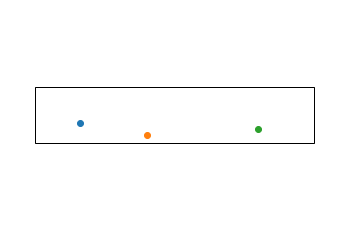

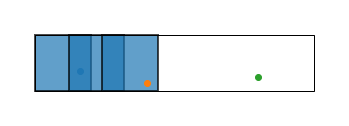

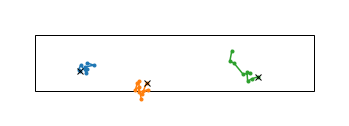

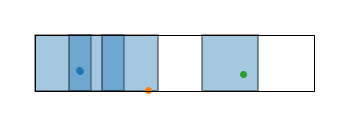

In [151]:
ce = conceptExample()

ce.plot_starting()
ce.plot_cams()
ce.plot_paths()
ce.plot_detections()


In [152]:
ce.df

,time,individual,x,y
0,0,0,0.800000,0.359347
1,1,0,0.777819,0.377097
2,2,1,2.026690,0.022814
3,5,2,3.725290,0.301791


In [153]:
def step_tracks(t, tracks, ce):
    det = ce.df[ce.df["time" ]==t]
    return ce.update_tracks(det, tracks)

In [154]:
def step_tracks_scores(t, tracks, ce, scores):
    det = ce.df[ce.df["time" ]==t]
#     gate_score(t, ce.df, ce.var, ce.thresh, np.multiply(*ce.cam_area), 3/5)
    return ce.update_score_tracks(det, tracks, scores)

In [155]:
ce.df

,time,individual,x,y
0,0,0,0.800000,0.359347
1,1,0,0.777819,0.377097
2,2,1,2.026690,0.022814
3,5,2,3.725290,0.301791


Make tracks and score them

In [156]:
tracks = ce.make_first_track()
scores = [0,0]

In [157]:
tracks1, scores1 = step_tracks_scores(1, tracks, ce, scores)
tracks2, scores2 = step_tracks_scores(2, tracks1, ce, scores1)
tracks3, scores3 = step_tracks_scores(3, tracks2, ce, scores2)
tracks4, scores4 = step_tracks_scores(4, tracks3, ce, scores3)
tracks5, scores5 = step_tracks_scores(5, tracks4, ce, scores4)
tracks6, scores6 = step_tracks_scores(6, tracks5, ce, scores5)

Gated detection 3 from 0
Gated detection 3 from 1
Gated detection 3 from 1


In [158]:
for i, t in enumerate(tracks2):
    print(t, scores2[i])

[0, nan, nan] 0
[0, nan, 2] -0.5128703565485111
[0, 1, nan] 0.4602161241864895
[0, 1, 2] 0.719668480107545
[nan, nan, nan] 0
[nan, nan, 2] 0
[nan, 1, nan] 0
[nan, 1, 2] 0.2594523559210555


**Make graph**

In [159]:
gtrack = np.array(tracks4)

In [160]:
gtrack

array([[ 0., nan, nan, nan, nan],
       [ 0., nan,  2., nan, nan],
       [ 0.,  1., nan, nan, nan],
       [ 0.,  1.,  2., nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan,  2., nan, nan],
       [nan,  1., nan, nan, nan],
       [nan,  1.,  2., nan, nan]])

In [161]:
import igraph

Graph building
1. Each track is a node
2. tracks which share a detection are incompatible so have an edge between

Make a graph with n vertices (where n is number of tracks)

In [162]:
g = igraph.Graph()
nverts = len(gtrack)
g.add_vertices(nverts)

Find the incompatible tracks

In [163]:
edges = []

for i, tr in enumerate(gtrack):
    diff = tr - gtrack
    for d in np.where(diff==0)[0]:
        if d != i:
            edges.append((i, d))

add edges to the graph

In [164]:
g.add_edges(edges)

In [165]:
hyps = g.maximal_independent_vertex_sets()

In [166]:
hyps

[(0, 4, 5, 6), (0, 4, 7), (1, 4, 6), (2, 4, 5), (3, 4)]

Score the generated hypotheses

In [167]:
def score_hypotheses(hyps, scores):
    hscores = []
    for hyp in hyps:
        hscores.append(np.sum([scores[h] for h in hyp]))
    return hscores

In [168]:
hscores = score_hypotheses(hyps,scores4 )

In [169]:
np.argmax(hscores)

4

In [170]:
np.argsort(hscores)

array([2, 0, 1, 3, 4])

In [172]:
[gtrack[h] for h in hyps[3]]

[array([ 0.,  1., nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan,  2., nan, nan])]

In [64]:
np.where(diff==0)[0]

array([0, 1, 1, 2, 3, 3, 5, 7])

In [63]:
diff

array([[ 0., nan, nan],
       [ 0., nan,  0.],
       [ 0., nan, nan],
       [ 0., nan,  0.],
       [nan, nan, nan],
       [nan, nan,  0.],
       [nan, nan, nan],
       [nan, nan,  0.]])

In [60]:
t - gtrack

array([[ 0., nan, nan],
       [ 0., nan, nan],
       [ 0., nan, nan],
       [ 0., nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])